## Project 3


The main objective of this project is to understand how the cases of covid-19 are progressing within each region individually and then on a global scale as a whole.

The aim is to:
-Analyze the progression of COVID-19 cases and deaths at the county and national levels in the US.
-Identify regions with rapid case increases, high slopes of cases per time, and windows of peak fatalities.
=Gain insights into the pandemic's spread and inform strategies like lockdown planning.

*Data description*

The datasets used in this project are time_series_covid19_confirmed_US.csv and time_series_covid19_deaths_US.csv.

The *columns* in the dataset are:
UID: Unique identifier
iso2, iso3, code3: Country codes
FIPS: Federal Information Processing Standard code
Admin2: County-level administrative unit
Province_State: State or province
Country_Region: Country
Latitude, Longitude: Geographic coordinates
Combined_Key: Unique identifier combining location and date
Time series data: Daily counts of confirmed cases or deaths




In [ ]:
#Import libraries (pandas, numpy, matplotlib, seaborn)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
covid19_confirmed = pd.read_csv('/content/time_series_covid19_confirmed_US.csv')
covid19_deaths = pd.read_csv('/content/time_series_covid19_deaths_US.csv')

# **Data cleaning **

Checking if there are any missing data

In [ ]:
#Check for Missing Values

print("Missing Values:\n", covid19_confirmed.isnull().sum())

print("Missing Values:\n", covid19_deaths.isnull().sum())

Missing Values:
 UID        0
iso2       0
iso3       0
code3      0
FIPS      10
          ..
3/5/23     0
3/6/23     0
3/7/23     0
3/8/23     0
3/9/23     0
Length: 1154, dtype: int64
Missing Values:
 UID        0
iso2       0
iso3       0
code3      0
FIPS      10
          ..
3/5/23     0
3/6/23     0
3/7/23     0
3/8/23     0
3/9/23     0
Length: 1155, dtype: int64


In [ ]:
#Check for Duplicate Rows
c19confirmed = covid19_confirmed.drop_duplicates()
print("Number of duplicate rows:", c19confirmed.duplicated().sum())

#Check for Duplicate Rows
c19deaths = covid19_deaths.drop_duplicates()
print("Number of duplicate rows:", c19deaths.duplicated().sum())


Number of duplicate rows: 0
Number of duplicate rows: 0


**THE ARE NO DUPLICATE ROWS**

In [ ]:
# Print the cleaned DataFrame
print( "This is covid 19 confirmed casses")
print(c19confirmed)

print("This is covid 19 deaths casses")
print(c19deaths)

This is covid 19 confirmed casses
           UID iso2 iso3  code3     FIPS      Admin2 Province_State  \
0     84001001   US  USA    840   1001.0     Autauga        Alabama   
1     84001003   US  USA    840   1003.0     Baldwin        Alabama   
2     84001005   US  USA    840   1005.0     Barbour        Alabama   
3     84001007   US  USA    840   1007.0        Bibb        Alabama   
4     84001009   US  USA    840   1009.0      Blount        Alabama   
...        ...  ...  ...    ...      ...         ...            ...   
3337  84056039   US  USA    840  56039.0       Teton        Wyoming   
3338  84056041   US  USA    840  56041.0       Uinta        Wyoming   
3339  84090056   US  USA    840  90056.0  Unassigned        Wyoming   
3340  84056043   US  USA    840  56043.0    Washakie        Wyoming   
3341  84056045   US  USA    840  56045.0      Weston        Wyoming   

     Country_Region        Lat       Long_  ... 2/28/23  3/1/23  3/2/23  \
0                US  32.539527  -86.64

# Explatory data analysis

<ipython-input-9-0fe0410bee8b>:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  national_cases.index = pd.to_datetime(national_cases.index)


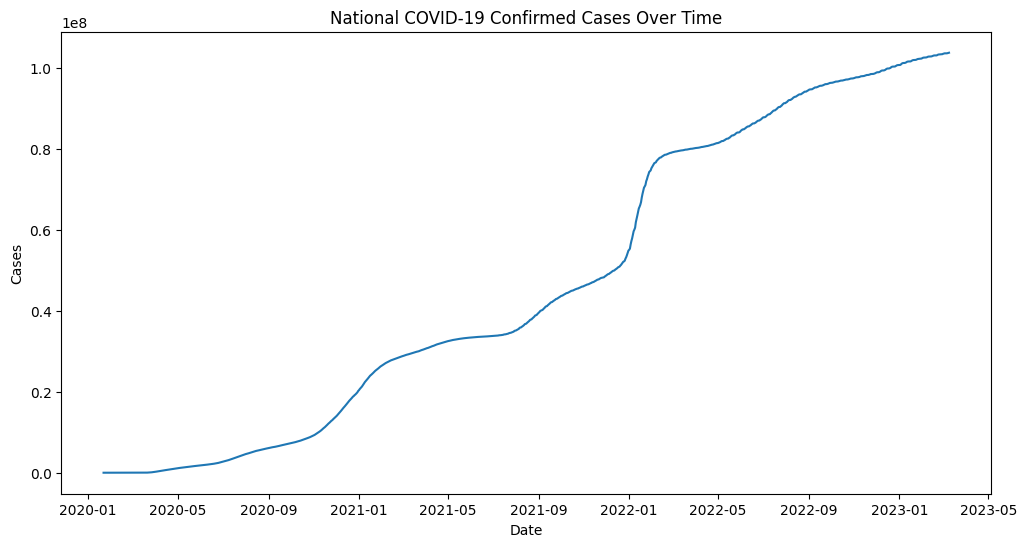

In [ ]:
#1. Time Series Plot of National Cases
def plot_national_cases(c19confirmed):
    national_cases = c19confirmed.iloc[:, 11:].sum()
    national_cases.index = pd.to_datetime(national_cases.index)
    plt.figure(figsize=(12, 6))
    plt.plot(national_cases)
    plt.title('National COVID-19 Confirmed Cases Over Time')
    plt.xlabel('Date')
    plt.ylabel('Cases')
    plt.show()

    # Use c19confirmed
plot_national_cases(c19confirmed)

The number of confirmed cases of Covid 19 gradually increased from Jan 2020 to May 2023. There was a very sharp increase in the periof Jan 2022 at March 2022.

In [ ]:
# 2. Time Series Plot of National Deaths
def plot_national_deaths(df):
    national_deaths = df.iloc[:, 11:].sum()
    national_deaths.index = pd.to_datetime(national_deaths.index)
    plt.figure(figsize=(12, 6))
    plt.plot(national_deaths, color='red')
    plt.title('National COVID-19 Deaths Over Time')
    plt.xlabel('Date')
    plt.ylabel('Deaths')
    plt.show()

    # Use c19deaths
plot_national_deaths(c19deaths)


<ipython-input-10-e98e7bf236dc>:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  national_deaths.index = pd.to_datetime(national_deaths.index)


DateParseError: Unknown datetime string format, unable to parse: Population, at position 0

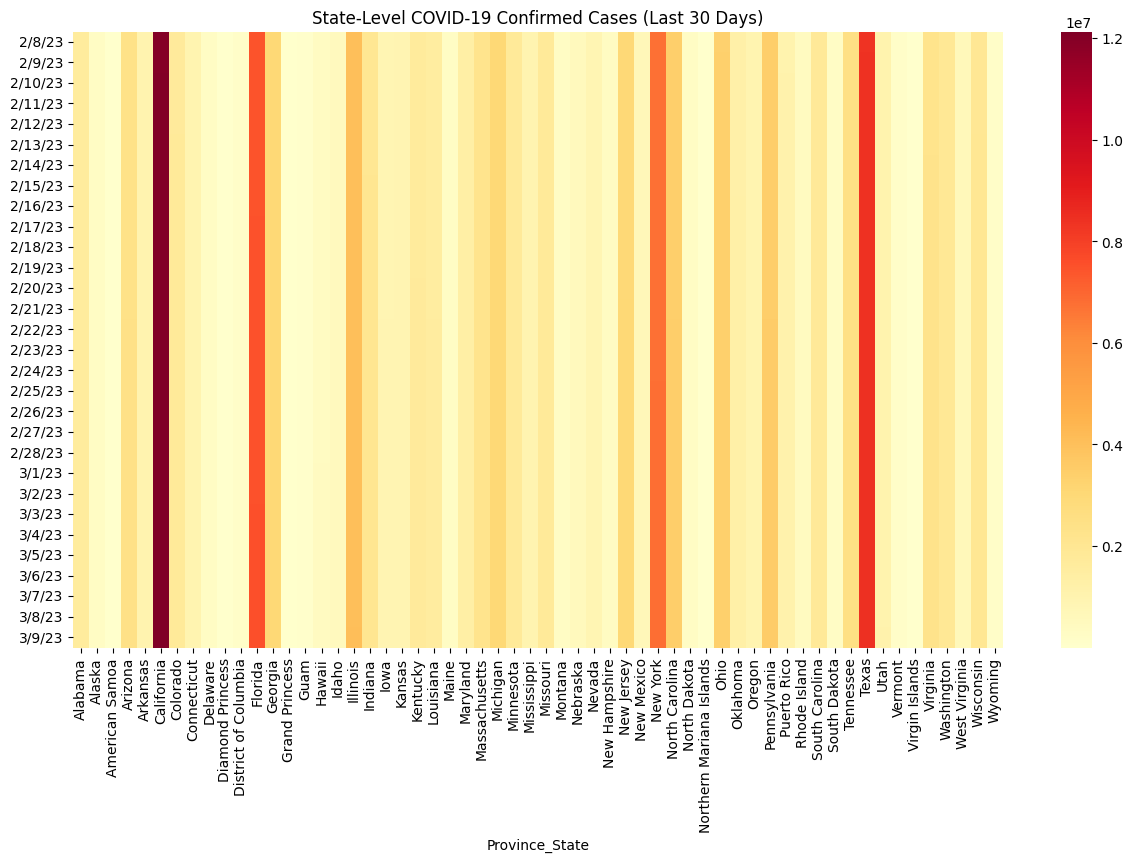

In [ ]:
# 3. Heatmap of State-Level Cases
def heatmap_state_cases(df):
    state_cases = df.groupby('Province_State').sum().iloc[:, -30:].T
    plt.figure(figsize=(15, 8))
    sns.heatmap(state_cases, cmap='YlOrRd')
    plt.title('State-Level COVID-19 Confirmed Cases (Last 30 Days)')
    plt.show()

  # Use c19confirmed
heatmap_state_cases(c19confirmed)


In [ ]:
# 4. Map of Total Cases by County (Plotly)

import plotly.express as px

def map_county_cases(c19confirmed):
    county_cases = c19confirmed.groupby(['Province_State', 'Admin2', 'Lat', 'Long_']).sum().iloc[:, -1]
    county_cases = county_cases.reset_index()
    fig = px.scatter_geo(county_cases, lat='Lat', lon='Long_', size=county_cases.columns[-1],
                         color='Province_State', hover_name='Admin2', scope='usa', title='Total COVID-19 Cases by County')
    fig.show()

# Use c19confirmed
map_county_cases(c19confirmed)


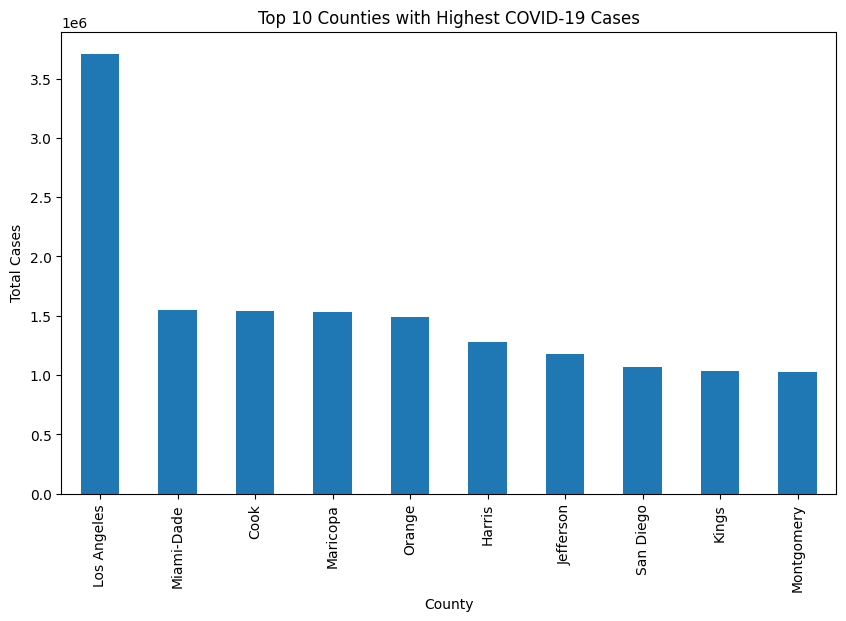

In [ ]:
# 5. Bar Plot of Top 10 Counties with Highest Cases
def bar_top_counties(c19confirmed):
    county_totals = c19confirmed.groupby('Admin2').sum().iloc[:, -1].sort_values(ascending=False).head(10)
    plt.figure(figsize=(10, 6))
    county_totals.plot(kind='bar')
    plt.title('Top 10 Counties with Highest COVID-19 Cases')
    plt.xlabel('County')
    plt.ylabel('Total Cases')
    plt.show()

    # Use c19confirmed
bar_top_counties(c19confirmed)


In [ ]:
# 6. Line Plot of Cases/Deaths in a Selected County
def plot_county_time_series(df_confirmed, df_deaths, county_name):
    county_confirmed = df_confirmed[df_confirmed['Admin2'] == county_name].iloc[:, 11:].sum()
    county_deaths = df_deaths[df_deaths['Admin2'] == county_name].iloc[:, 11:].sum()
    county_confirmed.index = pd.to_datetime(county_confirmed.index)
    county_deaths.index = pd.to_datetime(county_deaths.index)
    plt.figure(figsize=(12, 6))
    plt.plot(county_confirmed, label='Confirmed Cases')
    plt.plot(county_deaths, label='Deaths')
    plt.title(f'COVID-19 Cases and Deaths in {county_name}')
    plt.xlabel('Date')
    plt.ylabel('Counts')
    plt.legend()
    plt.show()

# Use c19confirmed and c19deaths
plot_county_time_series(c19confirmed, c19deaths, 'New York')